In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from column_renamer import *

### Loading dataset

In [3]:
# Selecting columns of interest

columns = ["NU_IDADE", "SG_UF_RESIDENCIA", "TP_SEXO", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "TP_ESCOLA", 
           "IN_TREINEIRO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "TP_LINGUA", 
           "NU_NOTA_REDACAO", "Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", 
           "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019", "Q020", "Q021", "Q022", "Q023", "Q024", "Q025"]

data = pd.read_csv("../dataset/raw_dataset.csv", sep = ";",encoding='latin1')
data = data[columns]
print(data.shape)
data.head()

(5095270, 40)


,NU_IDADE,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,21,PA,M,1,3,1,3,1,0,472.9,...,A,A,A,C,B,A,D,A,B,A
1,16,PA,F,1,3,3,0,1,1,358.9,...,A,A,A,B,B,A,B,A,A,A
2,18,PA,F,1,1,2,0,3,0,574.2,...,B,A,A,D,B,B,D,A,C,B
3,23,PA,M,0,3,2,0,2,0,NaN,...,A,A,A,C,A,A,D,A,A,A
4,23,PA,M,1,3,1,5,1,0,NaN,...,A,A,A,B,A,A,D,A,A,A


### Treating NA values

In [4]:
def count_NA_values(df):
    flag = 0
    for col in df.columns:
        na_sum = df[col].isna().sum()
        if na_sum != 0:
            flag = 1
            print("NA values on column " + col + ": " + str(na_sum))
    if flag == 0:
        print("There isn't any NA value")
        
count_NA_values(data)

NA values on column NU_NOTA_CN: 1384837
NA values on column NU_NOTA_CH: 1172125
NA values on column NU_NOTA_LC: 1172125
NA values on column NU_NOTA_MT: 1384837
NA values on column NU_NOTA_REDACAO: 1172126


In [5]:
# NA values are probably due to absence. We will remove them.

data = data.dropna()
count_NA_values(data)
print(data.shape)

There isn't any NA value
(3702007, 40)


### Removing trainees

In [6]:
data = data[data["IN_TREINEIRO"] == 0]
data = data.drop("IN_TREINEIRO", 1) 
print(data.shape)

(3174308, 39)


### Renomeando Colunas

In [9]:
data.columns = map_to_new_columns_name(data.columns)
data = data['NU_NOTA_MT']

### Distibuição das Notas

In [45]:
quantiles = np.concatenate([np.linspace(0.05,0.85,12), np.linspace(0.85,0.95,5),np.linspace(0.95,1.0,5)])
quantile_results = data.quantile(quantiles)

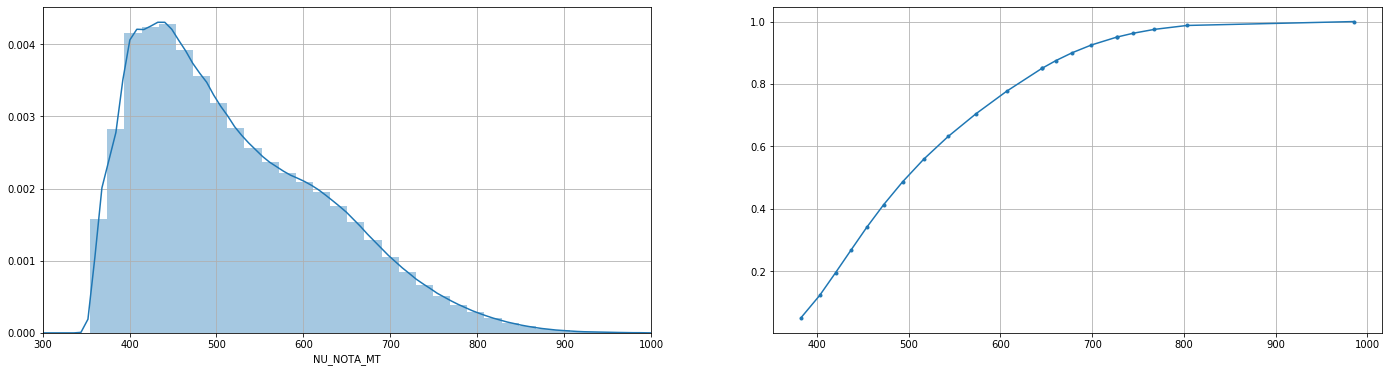

In [65]:
fig = plt.figure(figsize=(24,6))

plt.subplot(1,2,1)
plt.grid('on')
sns.distplot(data)
plt.xlim(300,1000)

plt.subplot(1,2,2)
plt.grid('on')
plt.plot(quantile_results,quantiles,marker='.')

In [52]:
for n in [800,700,600,500]:
    print(f'Percentagem com nota maior que {str(n)}: ',end='')
    print("{:.2%}".format(data[data.values > n].shape[0]/data.shape[0]))

Percentagem com nota maior que 800: 1.34%
Percentagem com nota maior que 700: 7.41%
Percentagem com nota maior que 600: 23.72%
Percentagem com nota maior que 500: 49.13%


##### Quantidade de alunos que consiguiria uma das 296000 vagas:

In [66]:
vagas = 235476+59028
print("{:.2%}".format(vagas/data.shape[0]))

9.28%
